In [53]:
import pandas as pd

In [54]:
data=pd.read_csv('Mall_Customers.csv')

In [55]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [57]:
data.shape


(200, 5)

In [58]:
print("number of rows",data.shape[0])

number of rows 200


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [60]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [61]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [62]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [63]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [64]:
from sklearn.cluster import KMeans

In [65]:
k_means = KMeans()
k_means.fit(x)

KMeans()

In [66]:
k_means = KMeans(n_clusters=5)
k_means.fit_predict(x)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [67]:
wcss=[]
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
wcss #within cluster sum of squares

[269981.28,
 183116.4295463669,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30241.343617936585,
 25061.304119069333,
 21794.8856090982,
 19656.498170168554]

In [69]:
import matplotlib.pyplot as plt

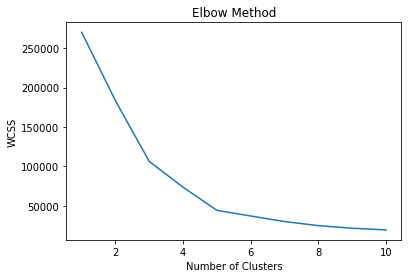

In [70]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [71]:
x = data[['Annual Income (k$)','Spending Score (1-100)']]

In [72]:
k_means = KMeans(n_clusters=5,random_state =42)
y_means = k_means.fit_predict(x)

In [73]:
y_means


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

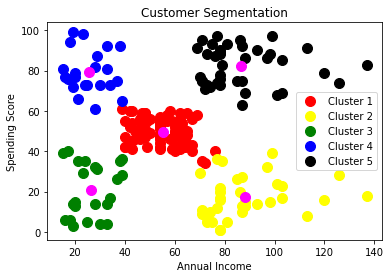

In [74]:
plt.scatter(x.iloc[y_means==0,0],x.iloc[y_means==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(x.iloc[y_means==1,0],x.iloc[y_means==1,1],s=100,c='yellow',label="Cluster 2")
plt.scatter(x.iloc[y_means==2,0],x.iloc[y_means==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(x.iloc[y_means==3,0],x.iloc[y_means==3,1],s=100,c='blue',label="Cluster 4")
plt.scatter(x.iloc[y_means==4,0],x.iloc[y_means==4,1],s=100,c='black',label="Cluster 5")
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [75]:
k_means.predict([[80,80]])

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [76]:
import joblib

In [77]:
joblib.dump(k_means,"customer_segmentation")

['customer_segmentation']

In [78]:
model = joblib.load("customer_segmentation")

In [79]:
model.predict([[80,80]])

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [80]:
#GUI 
from tkinter import *
import joblib

In [179]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result = model.predict([[p1, p2]])
    
    cluster_labels = [
        "Customers with medium annual income and medium annual spend",
        "Customers with high annual income but low annual spend",
        "Customers with low annual income and low annual spend",
        "Customers low annual income but high annual spend",
        "Customers with high annual income and high annual spend"
    ]
    
    result_label.configure(text="This Customer belongs to cluster no: " + str(result[0]))
    cluster_desc_label.configure(text=cluster_labels[result[0]])

master = Tk()
master.title("Customer Segmentation")
master.geometry("500x200")

# Styling
master.configure(bg="#f2f2f2")
header_font = ("Helvetica", 14, "bold")
label_font = ("Helvetica", 12)
result_font = ("Helvetica", 12, "bold")

# Header label
header_label = Label(master, text="Customer Segmentation Using Machine Learning", font=header_font, bg="#f2f2f2")
header_label.grid(row=0, columnspan=2,padx=15, pady=10)

# Input labels and entry fields
Label(master, text="Annual Income", font=label_font, bg="#f2f2f2").grid(row=1, sticky=E)
Label(master, text="Spending Score", font=label_font, bg="#f2f2f2").grid(row=2, sticky=E)

e1 = Entry(master, font=label_font)
e2 = Entry(master, font=label_font)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

# Predict button
predict_button = Button(master, text='Predict', command=show_entry_fields, font=label_font)
predict_button.grid(row=3, columnspan=2, pady=10)

# Result labels
result_label = Label(master, text="", font=result_font, bg="#f2f2f2")
result_label.grid(row=4, columnspan=2)

cluster_desc_label = Label(master, text="", font=label_font, bg="#f2f2f2")
cluster_desc_label.grid(row=5, columnspan=2)

mainloop()
